In [4]:
# !pip install pandas;
# !pip install matplotlib;
# !pip install sklearn;
!pip install scikit-fda;
# !pip install fathon;
# !pip install numpy;
# !pip install scipy;
# !pip install openpyxl;
# !pip install EntropyHub

     -------------------------------------- 398.3/398.3 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
     ---------------------------------------- 55.5/55.5 kB ? eta 0:00:00
     -------------------------------------- 399.1/399.1 kB 6.2 MB/s eta 0:00:00
     -------------------------------------- 987.3/987.3 kB 7.8 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 18.0 MB/s eta 0:00:00
     ---------------------------------------- 6.5/6.5 MB 23.0 MB/s eta 0:00:00
     ------------------------------------- 973.1/973.1 kB 31.1 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 22.6 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 16.0 MB/

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ljoe\\anaconda3\\envs\\capstonetest1\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from sklearn import preprocessing
import skfda
import fathon
import numpy as np
from fathon import fathonUtils as fu
from scipy.interpolate import CubicSpline
import openpyxl
import EntropyHub as eh


import warnings
warnings.filterwarnings('ignore')

#### Houskeeping Values

In [2]:
fs = 1/300 #sampling frequency (~1/300sec)
big_title_size = 24 #font size
subplot_title_size = 15 #font size

## Data Exploration

In [3]:
data = pd.read_excel('../data/ahr414_glucose_sample.xlsx')
#data.head()
data

PostDate IngestionDate                                        PostId  \
0    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
1    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
2    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
3    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
4    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
...         ...           ...                                           ...   
1715 2022-09-15    2022-09-15  NJzSaSpH2S0FQUZIksP82m6J78zZIwiBGO0SOJMQ3ZY=   
1716 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   
1717 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   
1718 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   
1719 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   

                    PostTime                                     PatientId  \
0    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
1    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
2    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
3    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
4    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
...                      ...                                           ...   
1715 2022-09-15 23:36:16.146  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   
1716 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   
1717 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   
1718 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   
1719 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   

      Stream  SequenceNumber                             TransmitterNumber  \
0     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
1     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
2     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
3     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
4     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
...      ...             ...                                           ...   
1715  Phone7      1663284944  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   
1716  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   
1717  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   
1718  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   
1719  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   

      ReceiverNumber      RecordedSystemTime  ...   GlucoseSystemTime  \
0                NaN 2022-09-13 23:16:01.009  ... 2022-09-13 23:15:45   
1                NaN 2022-09-13 23:20:57.025  ... 2022-09-13 23:20:45   
2                NaN 2022-09-13 23:25:57.029  ... 2022-09-13 23:25:45   
3                NaN 2022-09-13 23:30:57.030  ... 2022-09-13 23:30:45   
4                NaN 2022-09-13 23:35:57.152  ... 2022-09-13 23:35:45   
...              ...                     ...  ...                 ...   
1715             NaN 2022-09-15 23:31:09.365  ... 2022-09-15 23:31:01   
1716             NaN 2022-09-15 23:34:39.353  ... 2022-09-15 23:34:26   
1717             NaN 2022-09-15 23:39:40.239  ... 2022-09-15 23:39:26   
1718             NaN 2022-09-15 23:44:39.162  ... 2022-09-15 23:44:26   
1719             NaN 2022-09-15 23:49:38.456  ... 2022-09-15 23:49:27   

      GlucoseDisplayTime          GlucoseDisplayTimeRaw  Value        Status  \
0    2022-09-13 19:15:45  2022-09-13T19:15:45.000-04:00    111           NaN   
1    2022-09-13 19:20:45  2022-09-13T19:20:45.000-04:00    109           NaN   
2    2022-09-13 19:25:45  2022-09-13T19:25:45.000-04:00    111     

In [4]:
data.shape

(1720, 24)

In [5]:
conv_date = data.GlucoseDisplayTime.dt.time
data['day'] = data.GlucoseDisplayTime.dt.date

'''turning the time of day attribute into a float value where whole numbers are hours and fractions are minutes and seconds'''
timeOfday = pd.Series()
day = pd.Series()
for i in range(len(conv_date)):
    timeOfday.at[i] = conv_date[i].hour + conv_date[i].minute/60 + conv_date[i].second/3600
#timeOfday = cgm_functions.date2float(data.GlucoseDisplayTime.dt.time)
data['time'] = timeOfday

data.dtypes

PostDate                  datetime64[ns]
IngestionDate             datetime64[ns]
PostId                            object
PostTime                  datetime64[ns]
PatientId                         object
Stream                            object
SequenceNumber                     int64
TransmitterNumber                 object
ReceiverNumber                   float64
RecordedSystemTime        datetime64[ns]
RecordedDisplayTime       datetime64[ns]
RecordedDisplayTimeRaw            object
TransmitterId                     object
TransmitterTime                    int64
GlucoseSystemTime         datetime64[ns]
GlucoseDisplayTime        datetime64[ns]
GlucoseDisplayTimeRaw             object
Value                              int64
Status                            object
TrendArrow                        object
TrendRate                        float64
IsBackFilled                        bool
InternalStatus                     int64
SessionStartTime                   int64
day             

In [6]:
data.describe()

SequenceNumber  ReceiverNumber  TransmitterTime        Value  \
count    1.720000e+03             0.0     1.720000e+03  1720.000000   
mean     1.663201e+09             NaN     4.370138e+06   165.630814   
std      5.020869e+04             NaN     1.376234e+06    76.925032   
min      1.663115e+09             NaN     2.344574e+06     0.000000   
25%      1.663159e+09             NaN     2.473499e+06   108.000000   
50%      1.663203e+09             NaN     5.299724e+06   165.000000   
75%      1.663246e+09             NaN     5.365649e+06   210.250000   
max      1.663286e+09             NaN     5.476574e+06   401.000000   

         TrendRate  InternalStatus  SessionStartTime         time  
count  1646.000000     1720.000000      1.720000e+03  1720.000000  
mean     -0.015188        5.998837      7.880514e+07    11.993423  
std       0.791098        1.534175      5.619045e+08     6.954894  
min      -4.500000        1.000000      1.737447e+06     0.012778  
25%      -0.500000        6.000000      1.737447e+06     5.974931  
50%      -0.100000        6.000000      5.137335e+06    11.931806  
75%       0.400000        6.000000      5.137335e+06    18.098056  
max       2.700000       19.000000      4.294967e+09    23.989722

In [7]:
data.PatientId.value_counts() #you'll see the first patient has no missing values

tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=    580
iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=    575
9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=    565
Name: PatientId, dtype: int64

In [8]:
data.TransmitterId.value_counts()

XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=    580
ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=    575
PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=    565
Name: TransmitterId, dtype: int64

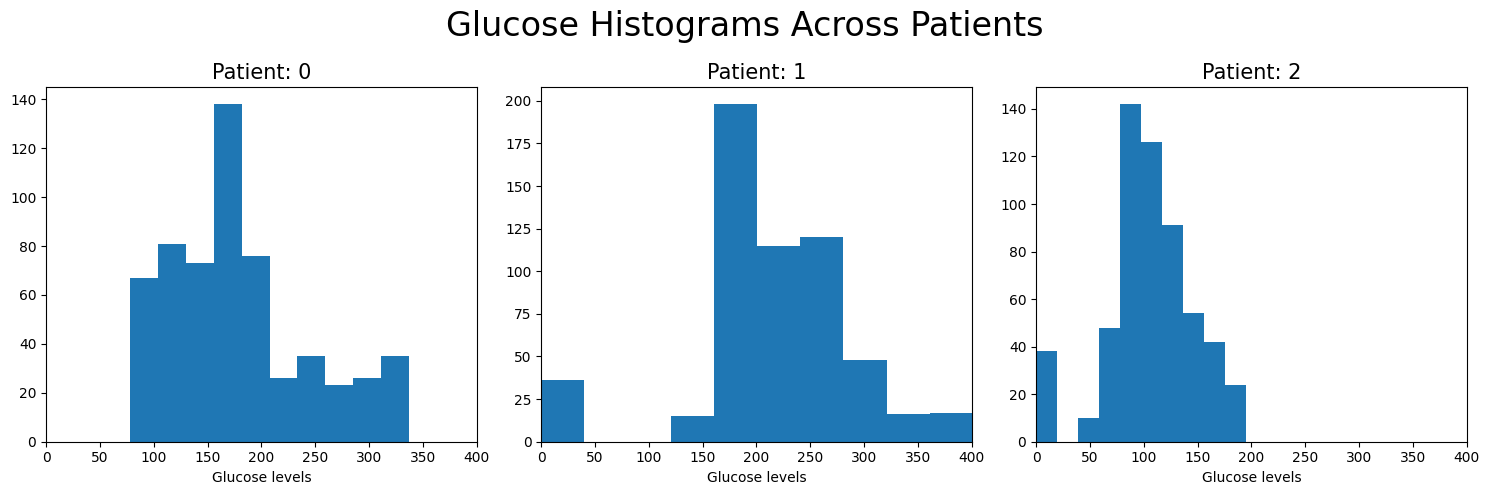

In [9]:
plt.rcParams["figure.figsize"] = (15,5)
patIDs = data.PatientId.unique()

data_dict = {}

for pat in range(len(patIDs)):
    plt.subplot(1,3,pat+1)
    subset = data.loc[data.PatientId == patIDs[pat]]
    
    data_dict[patIDs[pat]] = subset
    
    plt.hist(subset.Value)
    plt.xlim([0, 400])
    plt.title("Patient: " + str(pat), fontsize=subplot_title_size)
    plt.xlabel("Glucose levels")
    
plt.suptitle("Glucose Histograms Across Patients", fontsize=big_title_size)
plt.tight_layout()

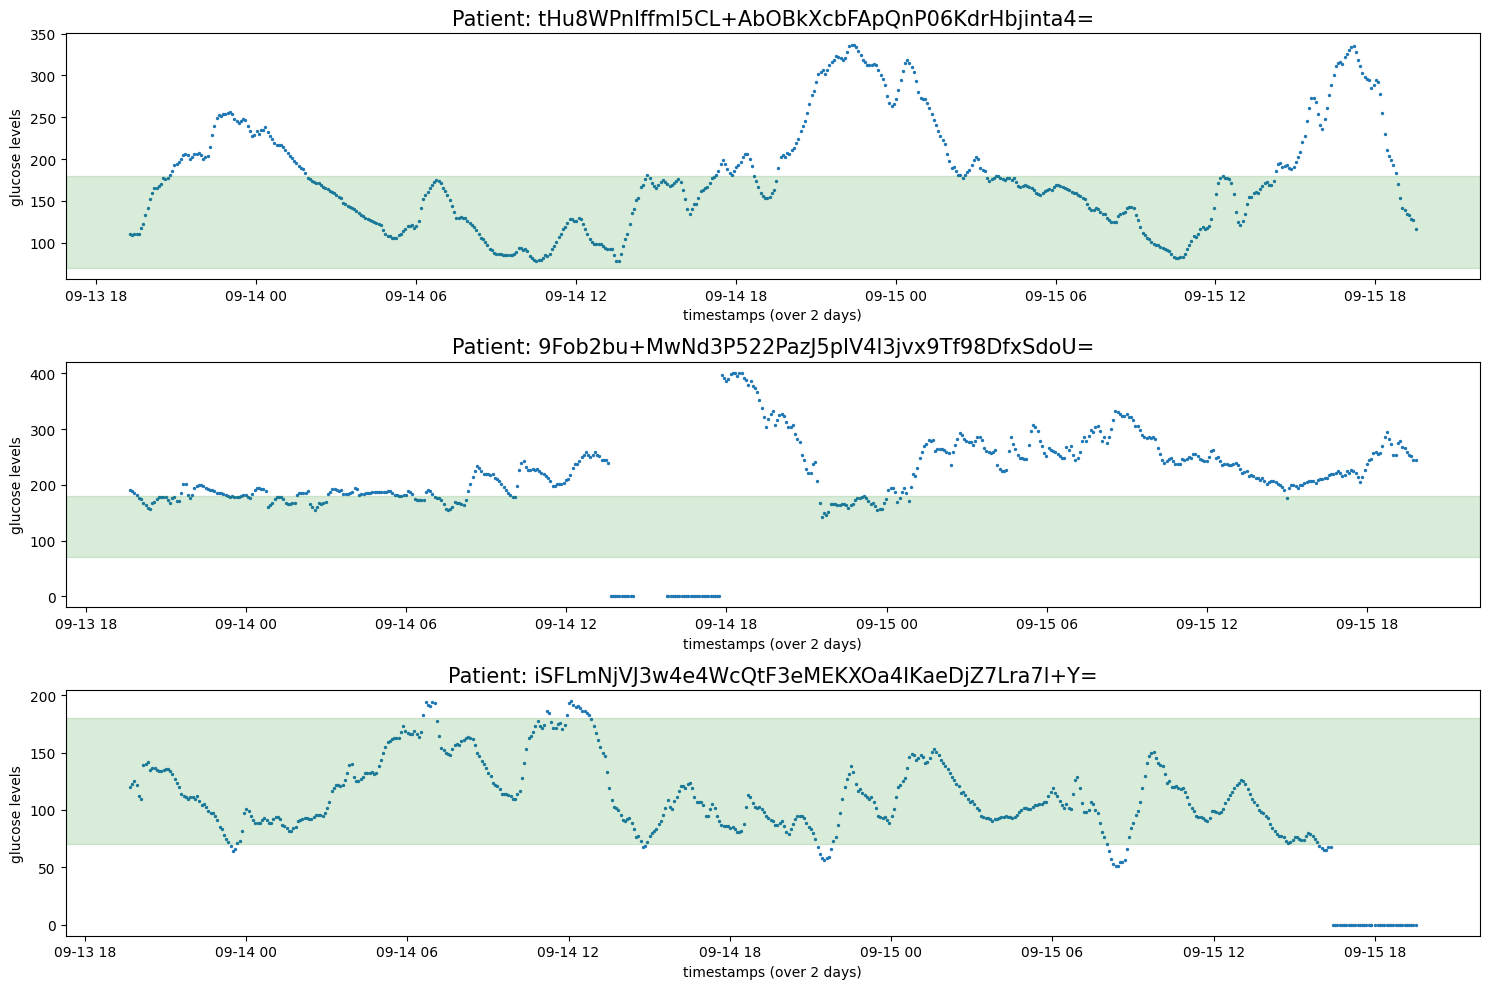

In [10]:
plt.rcParams["figure.figsize"] = (15,10)
count = 1
for key in data_dict.keys():
    subset = data_dict[key]
    subset.reset_index(inplace=True, drop=True)
    plt.subplot(3, 1, count)
    plt.scatter(subset.GlucoseDisplayTime, subset.Value, s=2)
    plt.axhspan(70, 180, color='green', alpha=0.15) # shading the in-range area between 70 and 180 mg/dL
    plt.title("Patient: " + key, fontsize=subplot_title_size)
    plt.xlabel("timestamps (over 2 days)")
    plt.ylabel("glucose levels")
    count += 1
plt.tight_layout()

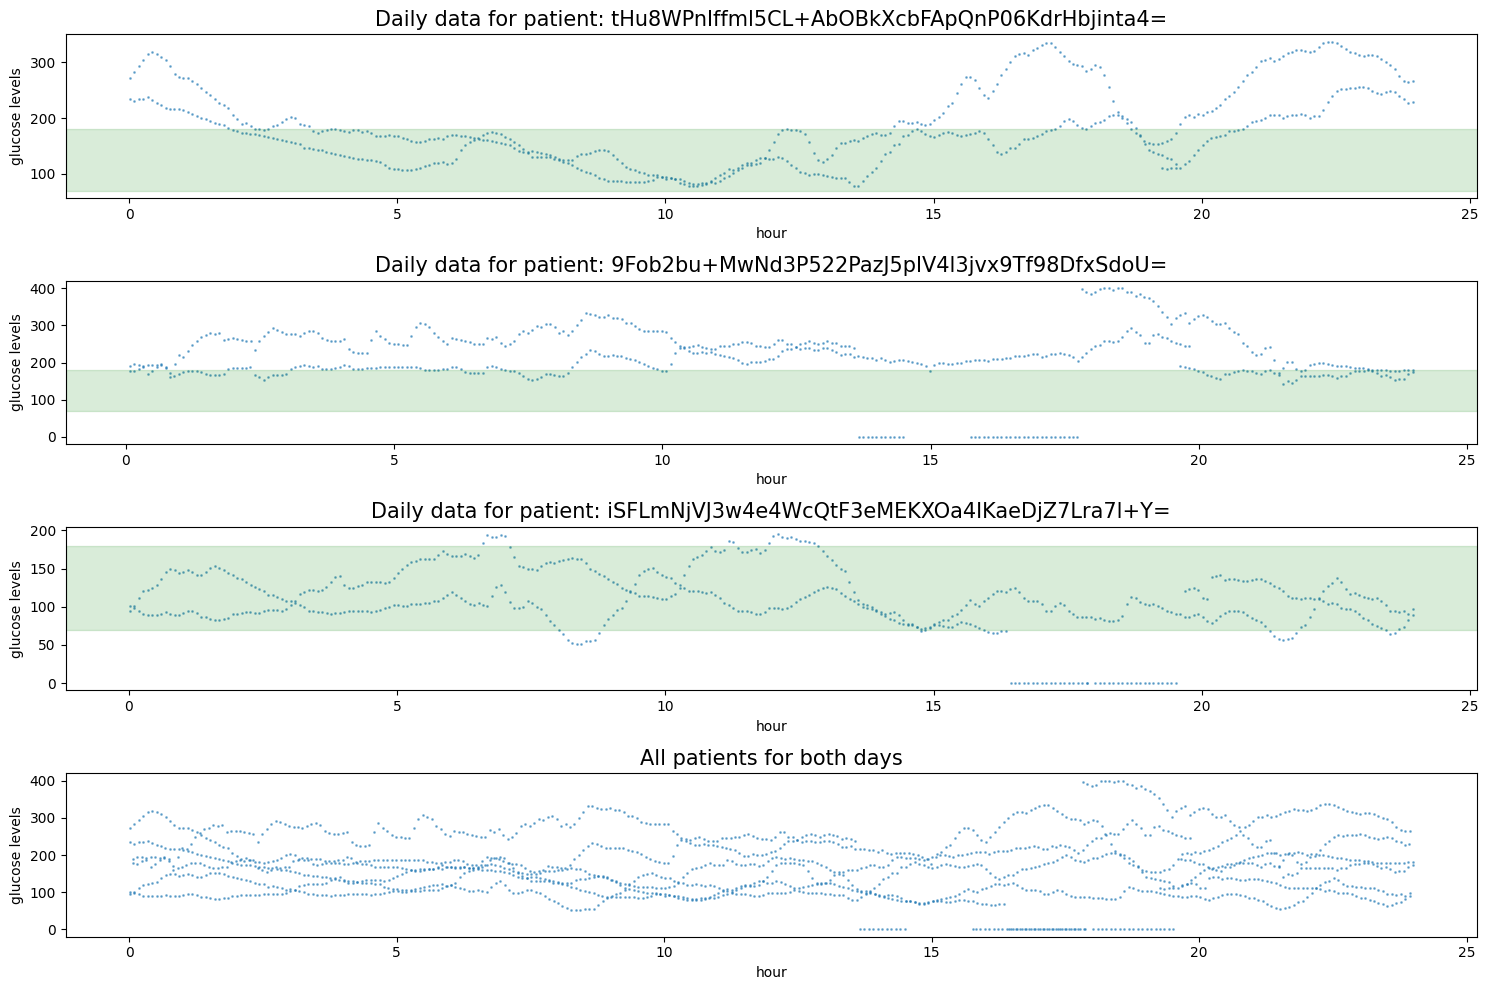

In [12]:
plt.rcParams["figure.figsize"] = (15,10)
count = 1
for key in data_dict.keys():
    subset = data_dict[key]
    plt.subplot(4, 1, count)
    # for date in subset.PostDate.unique():
    #     sep_day = subset.loc[subset.PostDate == date]
    #     sep_day.reset_index(inplace=True, drop=True)
    #     plt.scatter(setsep_day.Value)
    plt.scatter(subset.time, subset.Value, s=1, alpha=0.5)
    plt.axhspan(70, 180, color='green', alpha=0.15) # shading the in-range area between 70 and 180 mg/dL
    plt.title("Daily data for patient: " + key, fontsize=subplot_title_size)
    plt.xlabel("hour")
    plt.ylabel("glucose levels")
    count += 1
plt.subplot(4, 1, 4)
plt.scatter(data.time, data.Value, s=1, alpha=0.5)
plt.title("All patients over both days", fontsize=subplot_title_size)
plt.xlabel("hour")
plt.ylabel("glucose levels")
plt.tight_layout()

Text(0, 0.5, 'glucose levels')

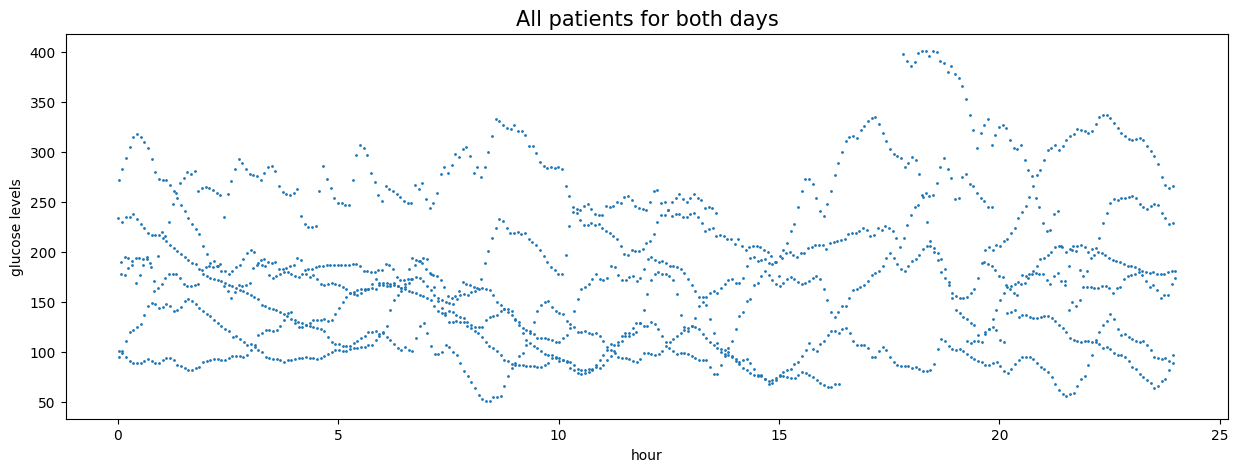

In [13]:
#same as the last figure in the above cell, but with dropped 0s
plt.rcParams["figure.figsize"] = (15,5)
drop_zero = data.loc[data.Value != 0]
plt.scatter(drop_zero.time, drop_zero.Value, s=1)
plt.title("All patients over both days", fontsize=subplot_title_size)
plt.xlabel("hour")
plt.ylabel("glucose levels")

## Testing Interpolation

In [15]:
'''add column of 0/1 that indicates if the data is missing'''
data['missing'] = pd.Series(0, data.index)
data.Value.replace(0, np.nan, inplace=True)
missing_label = data[data.Value.isnull()].index
data['missing'].iloc[missing_label] = 1

data

PostDate IngestionDate                                        PostId  \
0    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
1    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
2    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
3    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
4    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
...         ...           ...                                           ...   
1715 2022-09-15    2022-09-15  NJzSaSpH2S0FQUZIksP82m6J78zZIwiBGO0SOJMQ3ZY=   
1716 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   
1717 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   
1718 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   
1719 2022-09-15    2022-09-15  cS1mKno6TYhd9dxyVyDNGxORfzveKt8Fu7LljFFDgQw=   

                    PostTime                                     PatientId  \
0    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
1    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
2    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
3    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
4    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
...                      ...                                           ...   
1715 2022-09-15 23:36:16.146  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   
1716 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   
1717 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   
1718 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   
1719 2022-09-15 23:54:44.389  9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=   

      Stream  SequenceNumber                             TransmitterNumber  \
0     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
1     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
2     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
3     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
4     Phone7      1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
...      ...             ...                                           ...   
1715  Phone7      1663284944  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   
1716  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   
1717  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   
1718  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   
1719  Phone7      1663286051  PyW5hY6Hrg6Hdyjy59ZwN3vPapgM2Ym+6h45pblrcwQ=   

      ReceiverNumber      RecordedSystemTime  ...  Value        Status  \
0                NaN 2022-09-13 23:16:01.009  ...  111.0           NaN   
1                NaN 2022-09-13 23:20:57.025  ...  109.0           NaN   
2                NaN 2022-09-13 23:25:57.029  ...  111.0           NaN   
3                NaN 2022-09-13 23:30:57.030  ...  111.0           NaN   
4                NaN 2022-09-13 23:35:57.152  ...  110.0           NaN   
...              ...                     ...  ...    ...           ...   
1715             NaN 2022-09-15 23:31:09.365  ...    NaN  SensorWarmUp   
1716             NaN 2022-09-15 23:34:39.353  ...  254.0           NaN   
1717             NaN 2022-09-15 23:39:40.239  ...  251.0           NaN   
1718             NaN 2022-09-15 23:44:39.162  ...  245.0           NaN   
1719             NaN 2022-09-15 23:49:38.456  ...  245.0           NaN   

         TrendArrow  TrendRate IsBackFilled InternalStatus SessionStartTime  \
0              Flat        0.2        False              6          5137335   
1              Flat        0.1        False              6          5137335   
2              Flat        0.1        False              6

In [16]:
'''create dataframe for holding the interpolated data'''
interp_df = pd.DataFrame(columns=data.columns)

for pat in range(len(patIDs)):
    subset = data.loc[data.PatientId == patIDs[pat]]  
    subset.sort_values("GlucoseDisplayTime", ascending=True, inplace=True)
    subset.Value.interpolate(method='quadratic', inplace=True)
    interp_df = pd.concat([interp_df, subset])
    
interp_df.dropna(axis=0, subset="Value", inplace=True)

interp_df

PostDate IngestionDate                                        PostId  \
0    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
1    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
2    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
3    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
4    2022-09-14    2022-09-14  fyQ0wOxwB8sthzC75TWKpqdrCMCLq+W1wBg9s7MHVcE=   
...         ...           ...                                           ...   
1589 2022-09-15    2022-09-15  9T8PbD/oVaaK5JHMSuwN7OfXersB4Cvt6aZGuFDi5Nw=   
1592 2022-09-15    2022-09-15  9T8PbD/oVaaK5JHMSuwN7OfXersB4Cvt6aZGuFDi5Nw=   
1595 2022-09-15    2022-09-15  9T8PbD/oVaaK5JHMSuwN7OfXersB4Cvt6aZGuFDi5Nw=   
1598 2022-09-15    2022-09-15  9T8PbD/oVaaK5JHMSuwN7OfXersB4Cvt6aZGuFDi5Nw=   
1601 2022-09-15    2022-09-15  9T8PbD/oVaaK5JHMSuwN7OfXersB4Cvt6aZGuFDi5Nw=   

                    PostTime                                     PatientId  \
0    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
1    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
2    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
3    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
4    2022-09-14 00:26:00.264  tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=   
...                      ...                                           ...   
1589 2022-09-15 21:26:13.267  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   
1592 2022-09-15 21:26:13.267  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   
1595 2022-09-15 21:26:13.267  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   
1598 2022-09-15 21:26:13.267  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   
1601 2022-09-15 21:26:13.267  iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=   

      Stream SequenceNumber                             TransmitterNumber  \
0     Phone7     1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
1     Phone7     1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
2     Phone7     1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
3     Phone7     1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
4     Phone7     1663115129  XFgG633aV9tw5Gclf1WB6nmt9Wgv4nHJjXfRQIAOfsg=   
...      ...            ...                                           ...   
1589  Phone7     1663277141  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   
1592  Phone7     1663277141  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   
1595  Phone7     1663277141  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   
1598  Phone7     1663277141  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   
1601  Phone7     1663277141  ooCpoqwYamjWbw9he1aD0nUS2ebxSd6xTiR+gnYgcIM=   

      ReceiverNumber      RecordedSystemTime  ...  Value Status TrendArrow  \
0                NaN 2022-09-13 23:16:01.009  ...  111.0    NaN       Flat   
1                NaN 2022-09-13 23:20:57.025  ...  109.0    NaN       Flat   
2                NaN 2022-09-13 23:25:57.029  ...  111.0    NaN       Flat   
3                NaN 2022-09-13 23:30:57.030  ...  111.0    NaN       Flat   
4                NaN 2022-09-13 23:35:57.152  ...  110.0    NaN       Flat   
...              ...                     ...  ...    ...    ...        ...   
1589             NaN 2022-09-15 20:16:10.471  ...   67.0    NaN       Flat   
1592             NaN 2022-09-15 20:16:10.471  ...   65.0    NaN       Flat   
1595             NaN 2022-09-15 20:16:10.471  ...   65.0    NaN       Flat   
1598             NaN 2022-09-15 20:16:10.346  ...   68.0    NaN       Flat   
1601             NaN 2022-09-15 20:21:08.586  ...   68.0    NaN       Flat   

     TrendRate IsBackFilled InternalStatus SessionStartTime         day  \
0          0.2        False              6          5137335  2022-09-13   
1          0.1        False              6          5137335  2022-09-13   
2          0.1        False       

Text(0, 0.5, 'glucose levels')

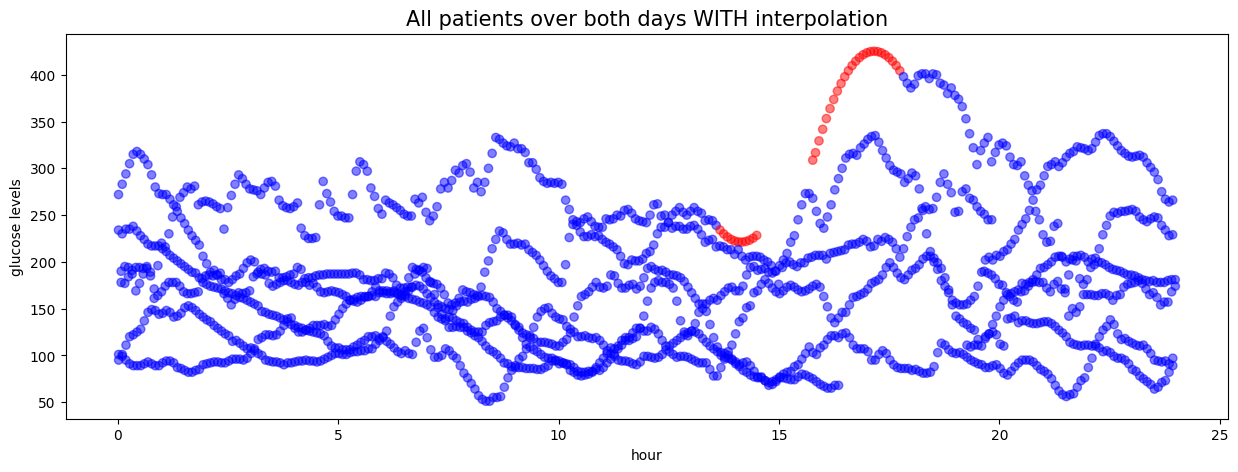

In [17]:
'''plot regularly recorded glucose values in blue, and the interpolated in red'''
colors = {0: 'blue', 1: 'red'}
plt.scatter(interp_df.time, interp_df.Value, color=interp_df['missing'].map(colors), alpha=0.5)
#plt.plot(interp_df.time, interp_df.Value, cmap=['blue', 'red'])
plt.title("All patients over both days WITH interpolation", fontsize=subplot_title_size)
plt.xlabel("hour")
plt.ylabel("glucose levels")

## Testing variance methods

In [20]:
scales_minute = np.array([15, 30, 60, 120, 240, 480, 720, 960, 1200, 1440])
scales_sample = np.divide(scales_minute, 5)

pats = {key: [] for key in data.PatientId.unique()}
pats

{'tHu8WPnIffml5CL+AbOBkXcbFApQnP06KdrHbjinta4=': [],
 '9Fob2bu+MwNd3P522PazJ5pIV4l3jvx9Tf98DfxSdoU=': [],
 'iSFLmNjVJ3w4e4WcQtF3eMEKXOa4IKaeDjZ7Lra7l+Y=': []}

In [19]:
for pat in patIDs:
    subset = data.loc[data.PatientId == pat]
    pats[pat] = {key: [] for key in scales_sample}
    
    for key in pats[pat].keys():
        steps = np.intc(len(subset.index) / key)
        leftover = len(subset.index) % key
        window = np.intc(key)
        
        for i in range(steps):
            coarse = np.mean(subset.Value[i*window : (i+1)*window-1])
            pats[pat][key].append(coarse)

580


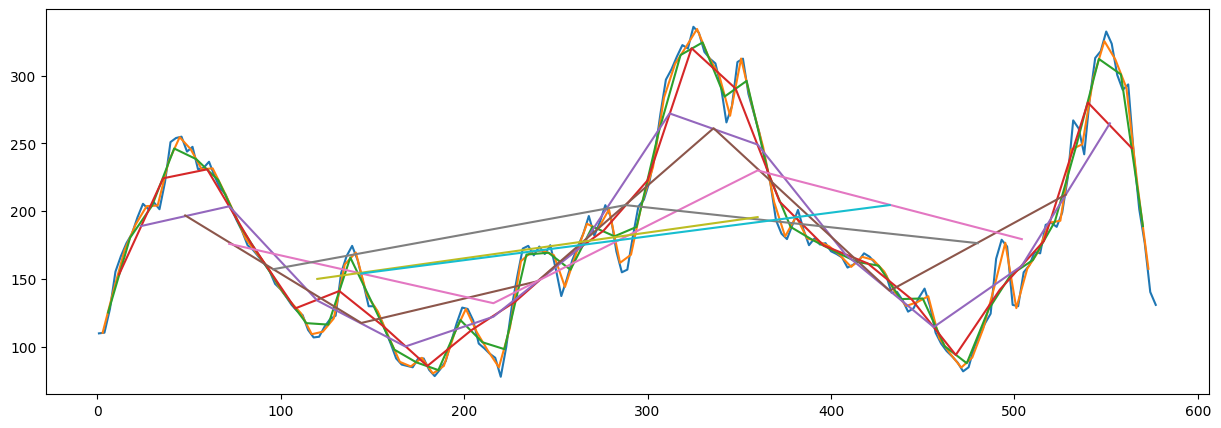

In [19]:
pat = patIDs[0]
subset = data.loc[data.PatientId == pat]
len_sub = len(subset.index)
print(len_sub)

for key in pats[pat]:
    x_tick = np.arange(start=key//2, stop=len_sub-(key//2), step=key)
    
    if len(x_tick) > len(pats[pat][key]):
        x_tick = x_tick[0:len(pats[pat][key])]
    
    plt.plot(x_tick, pats[pat][key])

## Detrended Fluctuation Analysis

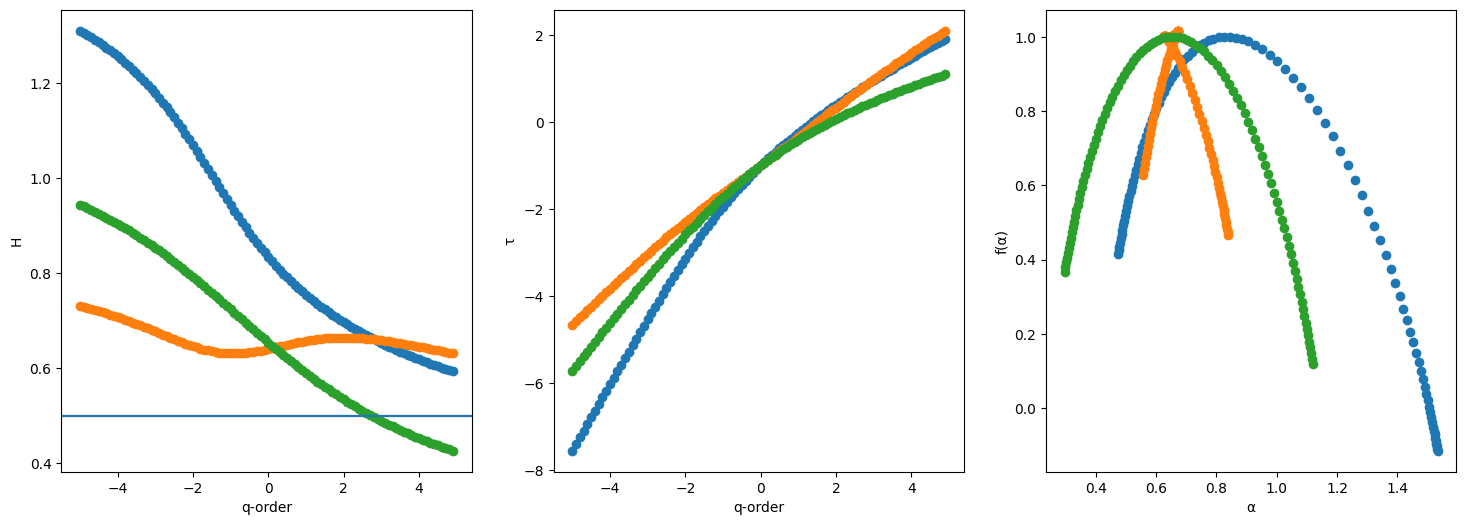

In [20]:
plt.rcParams["figure.figsize"] = (18,6)

test = 0
for pat in patIDs:
    subset = interp_df.loc[interp_df['PatientId'] == pat]
    diff_pat = np.diff(subset.Value)
    diff_pat = diff_pat - np.mean(diff_pat)


    a = fu.toAggregated(diff_pat)

    #initialize mfdfa object
    pymfdfa = fathon.MFDFA(a)
    #compute fluctuation function and generalized Hurst exponents
    wins = fu.linRangeByStep(10, 200)
    n, F = pymfdfa.computeFlucVec(wins, np.arange(-5, 5, 0.1), revSeg=True, polOrd=1)
    list_H, list_H_intercept = pymfdfa.fitFlucVec()

    plt.subplot(1,3,1)
    plt.scatter(np.arange(-5, 5, 0.1), list_H)
    plt.xlabel('q-order')
    plt.ylabel('H')
    plt.axhline(0.5)
    #compute mass exponents
    tau = pymfdfa.computeMassExponents()

    plt.subplot(1,3,2)
    plt.scatter(np.arange(-5,5,0.1), tau)
    plt.ylabel('τ')
    plt.xlabel('q-order')
    
    #compute multifractal spectrum
    plt.subplot(1,3,3)
    alpha, mfSpect = pymfdfa.computeMultifractalSpectrum()
    plt.scatter(alpha, mfSpect)
    plt.ylabel('f(α)')
    plt.xlabel('α')
    

## Entropy

In [21]:
test = interp_df.loc[interp_df['PatientId'] == patIDs[0]]
test_data = np.array(test.Value)

Perm, Pnorm, cPE = eh.PermEn(test_data, m = 5, tau = 1,
                             Typex = 'finegrain', tpx = 1, Logx = 10, Norm=False)

In [25]:
test = 1/(3600*6)
test

4.6296296296296294e-05

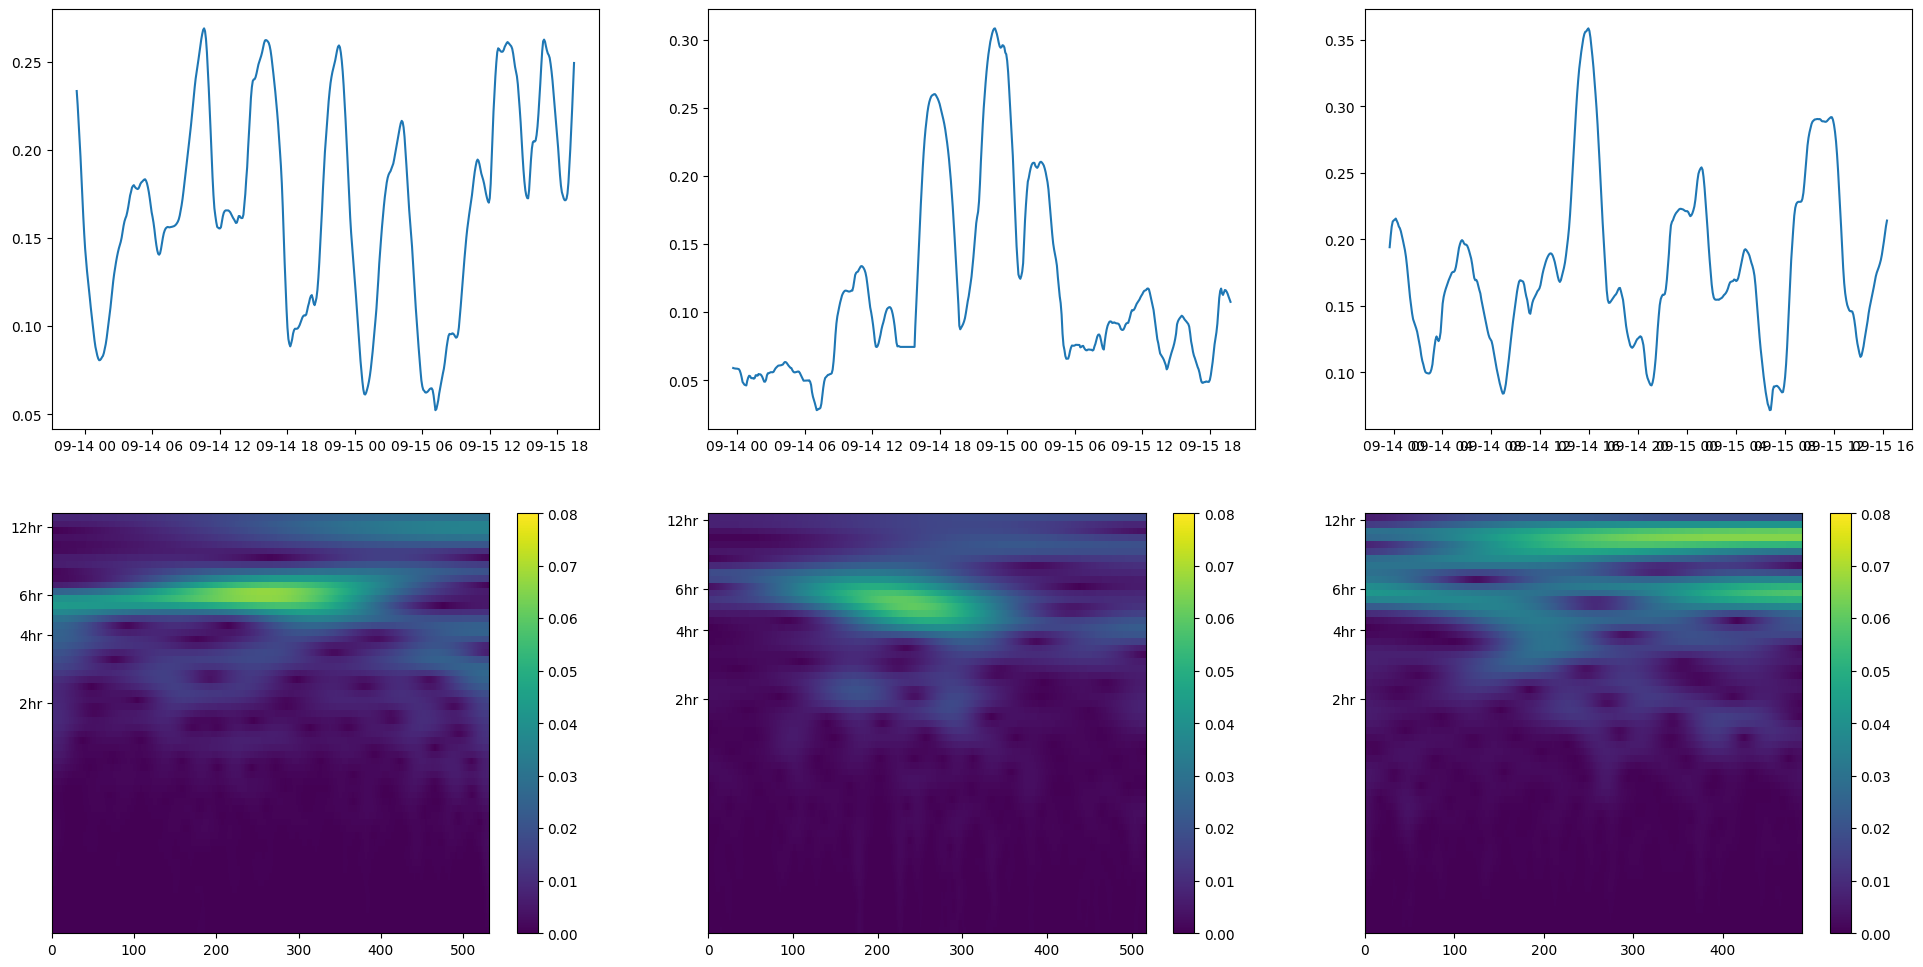

In [26]:
plt.rcParams["figure.figsize"] = (24,12)
plot = 1
for pat in patIDs:
    subset = interp_df.loc[interp_df.PatientId == pat]
    sample = subset.Value
    window = 48
    #steps = len(sample) // window
    steps = len(sample) - window;
    track = []
    for step in range(steps):
    #for i in range(1):
        portion = sample[step : step+window].values
        SE, A, B = eh.SampEn(portion, m = 2, tau = 1)
        #track.append(SE[:][1])
        track.append(np.std(portion)/np.mean(portion))
    x_tick = np.arange(start=window, stop=len(sample), step=1)
    plt.subplot(2, 3, plot)
    plt.plot(subset.GlucoseDisplayTime.iloc[x_tick], track)
    #plt.ylim([0, 1.6])
    
    [wt, f, coi] = eng.cwt(np.array(track), fs, nargout=3)
    f = np.array(f)
    wt = eng.abs(wt)
    plt.subplot(2,3,3+plot)
    #plt.imshow(wt, aspect='auto')
    plt.pcolor(wt, vmin=0, vmax=0.08)
    #plt.pcolor(wt)
    plt.colorbar()
    plt.yticks([34, 44, 50, 60], ['2hr', '4hr', '6hr', '12hr'])
    plot += 1

 . . . . . . . . . . . .

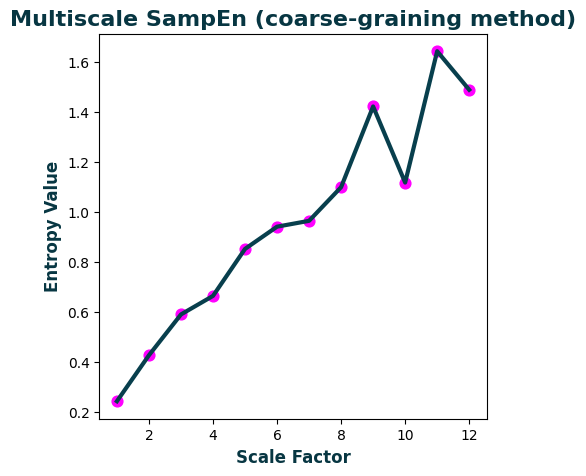

11.446162569940453
 . . . . . . . . . . . .

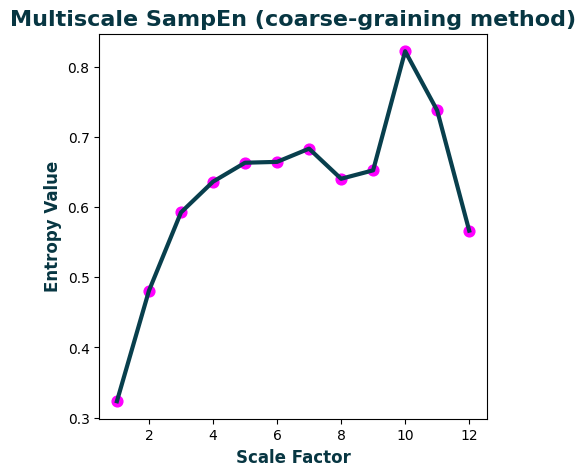

7.4620807252208445
 . . . . . . . . . . . .

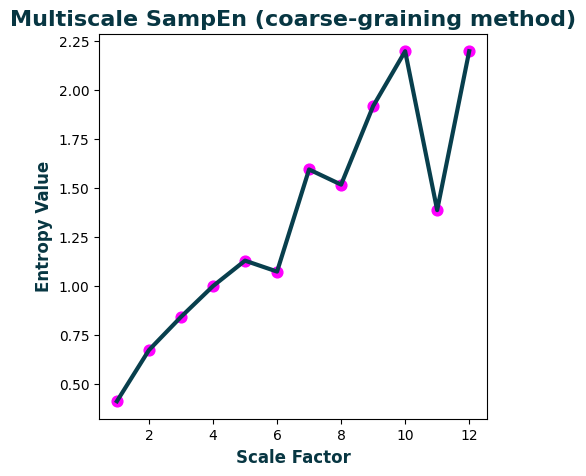

15.931795070262764


In [27]:
plt.rcParams["figure.figsize"] = (5,5)
plot = 1
Mobj = eh.MSobject('SampEn')
for pat in patIDs:
    subset = interp_df.loc[interp_df['PatientId'] == pat]
    test_data = np.array(subset.Value)
    MSx, Ci = eh.MSEn(test_data, Mobj, Scales = 12, Methodx = 'coarse', Plotx = True)
    print(np.sum(MSx))
    

In [28]:
from itertools import permutations

m = 3
test_perm = pd.DataFrame()
test_rank = pd.DataFrame(columns=range(m))
for i in range(m):
    test_perm[i] = test_data[0+i : len(test_data)-m+i]

In [29]:
for i in range(len(test_perm.index)):
    array = test_perm.iloc[i, :]
    order = array.argsort()
    ranks = order.argsort()
    test_rank.loc[i] = ranks.values

In [30]:
perms = list(permutations(range(m)))
np.array(perms)[0]

array([0, 1, 2])

In [31]:
perms_dict = {key: [] for key in perms}
keys = perms_dict.keys()

for i in range(len(test_rank.index)):
    motif = test_rank.iloc[i, :].values.tolist()
    motif = np.array([motif])
    motif = tuple(map(tuple, motif))
    perms_dict[motif[0]].append(i)


In [32]:
for key in keys:
    print(key, len(perms_dict[key]))

(0, 1, 2) 196
(0, 2, 1) 22
(1, 0, 2) 26
(1, 2, 0) 47
(2, 0, 1) 43
(2, 1, 0) 200


## Spectral Analysis

### Patient 1

In [33]:
subset = interp_df.loc[interp_df.PatientId == patIDs[0]]
mat_dat = subset.Value.values
len(mat_dat)

580

In [34]:
[imf, res] = eng.emd(mat_dat, nargout=2)

In [35]:
test = np.array(imf)

In [36]:
test.shape

(580, 6)

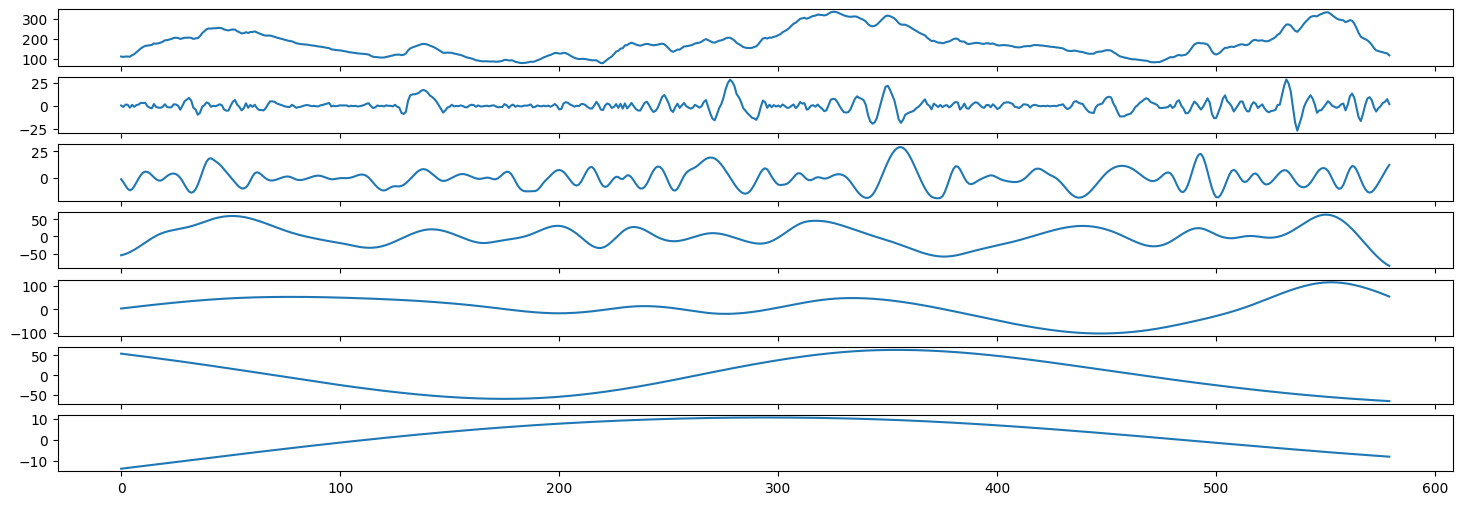

In [37]:
plt.rcParams["figure.figsize"] = (18,6)
plt.subplot(7,1,1)
plt.plot(mat_dat)
for i in range(test.shape[1]):
    plt.subplot(7, 1, i+2)
    plt.plot(test[:,i])

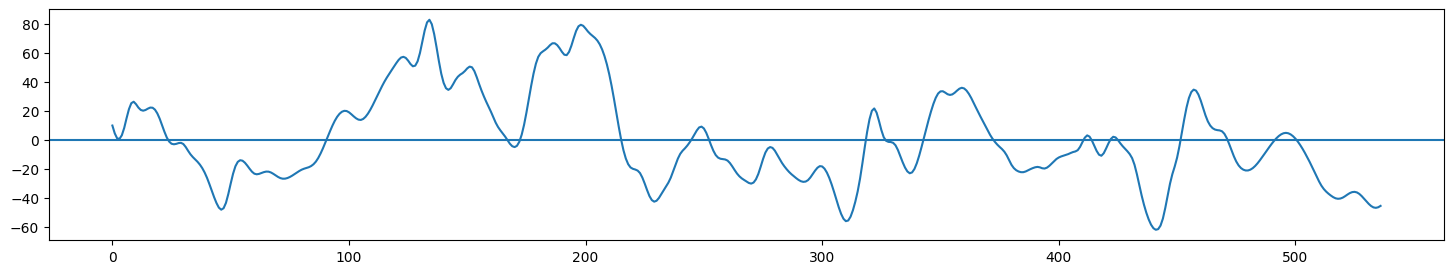

In [70]:
plt.rcParams["figure.figsize"] = (18,3)
rem_fast = mat_dat - test[:,0]
plt.plot(rem_fast - np.mean(rem_fast))
plt.axhline(0)

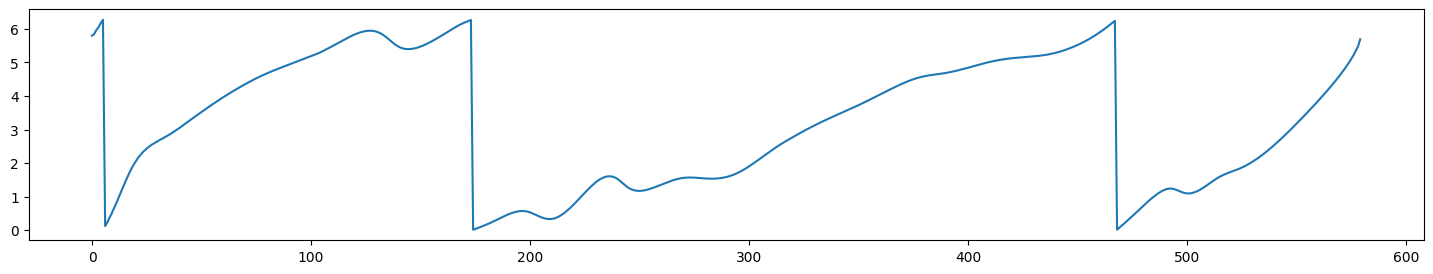

In [39]:
phase = rem_fast - test[:,1]
y = eng.hilbert(phase - np.mean(phase))
ang = np.array(eng.angle(y))
ang = ang + np.pi
plt.plot(ang[0])

In [40]:
[wt1, f1, coi1] = eng.cwt(mat_dat, fs, nargout=3)
[wt2, f2, coi2] = eng.cwt(rem_fast, fs, nargout=3)
wt1 = eng.abs(wt1)
wt2 = eng.abs(wt2)
[wcoh,wcs,f] = eng.wcoherence(mat_dat,rem_fast,fs, nargout=3)
lowpass = eng.lowpass(mat_dat, 1/3000, fs)
[wcoh1,wcs1,f1] = eng.wcoherence(mat_dat,lowpass,fs, nargout=3)

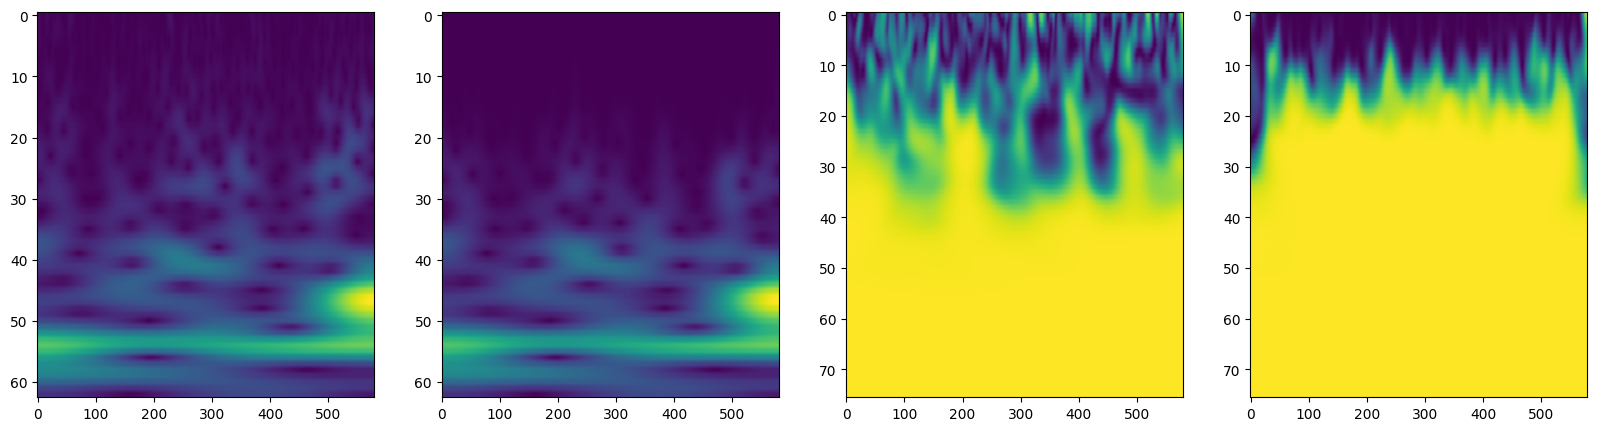

In [41]:
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1,4,1)
plt.imshow(wt1, aspect='auto')
plt.subplot(1,4,2)
plt.imshow(wt2, aspect='auto')
plt.subplot(1,4,3)
plt.imshow(wcoh, aspect='auto')
plt.subplot(1,4,4)
plt.imshow(wcoh1, aspect='auto')

### Patient 2

In [42]:
subset = interp_df.loc[interp_df.PatientId == patIDs[1]]
mat_dat = subset.Value.values
len(mat_dat)

565

In [43]:
[imf, res] = eng.emd(mat_dat, nargout=2)

In [44]:
test = np.array(imf)

In [45]:
test.shape

(565, 6)

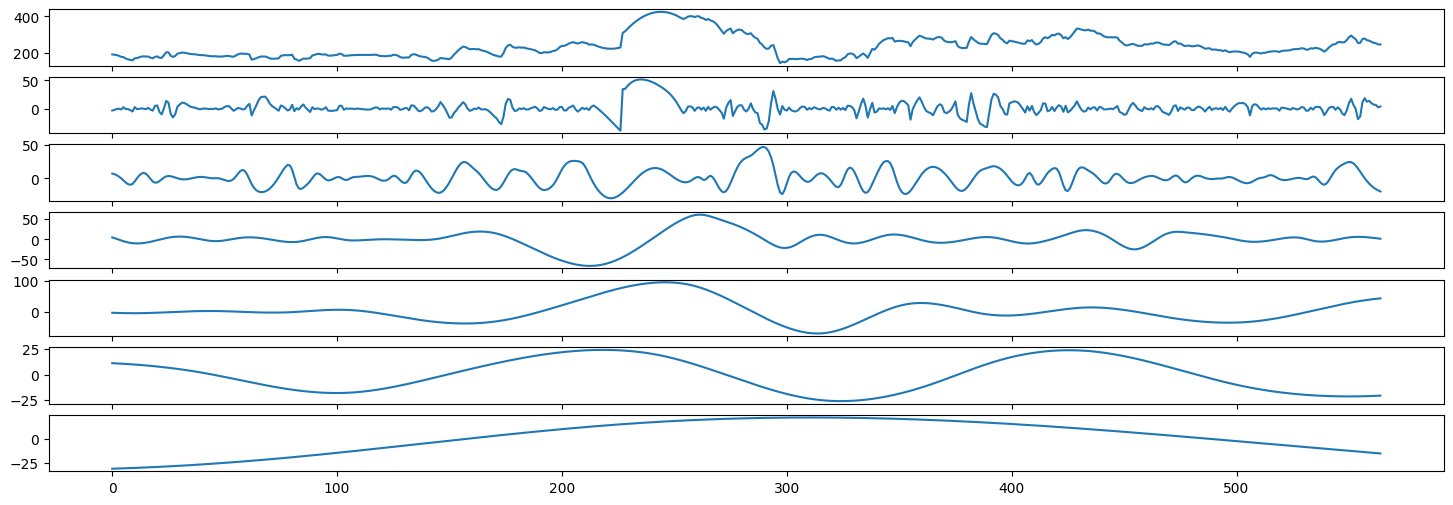

In [46]:
plt.rcParams["figure.figsize"] = (18,6)
plt.subplot(7,1,1)
plt.plot(mat_dat)
for i in range(test.shape[1]):
    plt.subplot(7, 1, i+2)
    plt.plot(test[:,i])

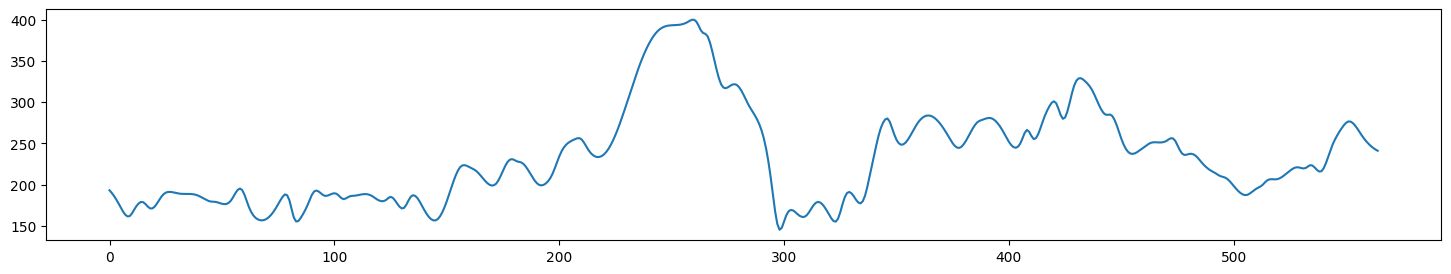

In [47]:
plt.rcParams["figure.figsize"] = (18,3)
rem_fast = mat_dat - test[:,0]
plt.plot(rem_fast)

In [48]:
[wt1, f1, coi1] = eng.cwt(mat_dat, fs, nargout=3)
[wt2, f2, coi2] = eng.cwt(rem_fast, fs, nargout=3)
wt1 = eng.abs(wt1)
wt2 = eng.abs(wt2)
[wcoh,wcs,f] = eng.wcoherence(mat_dat,rem_fast,fs, nargout=3)
lowpass = eng.lowpass(mat_dat, 1/3000, fs)
[wcoh1,wcs1,f1] = eng.wcoherence(mat_dat,lowpass,fs, nargout=3)

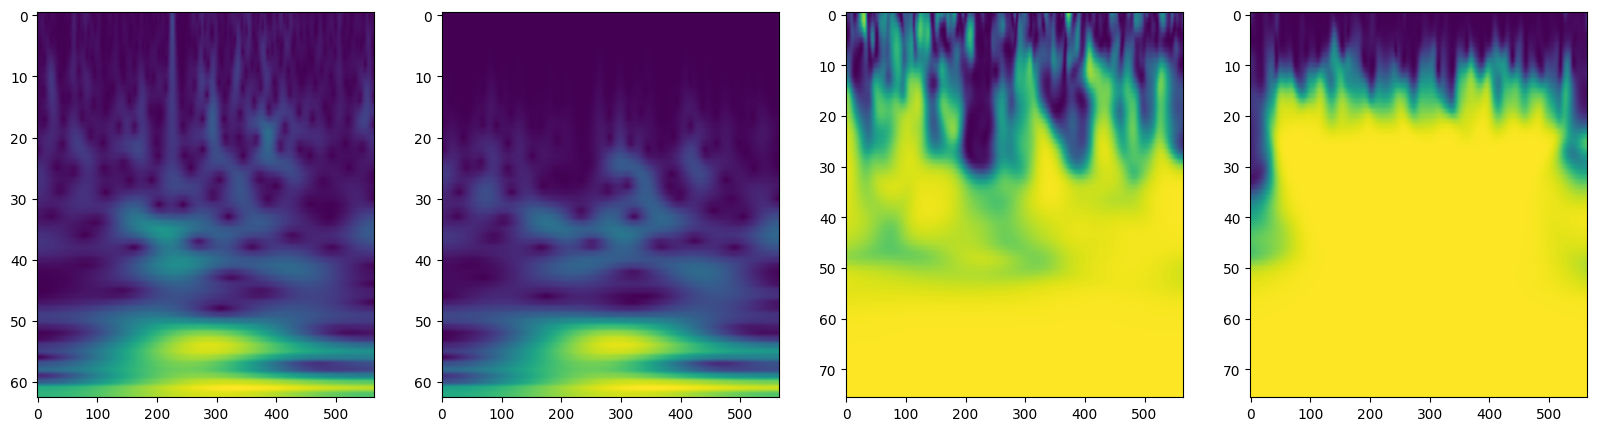

In [49]:
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1,4,1)
plt.imshow(wt1, aspect='auto')
plt.subplot(1,4,2)
plt.imshow(wt2, aspect='auto')
plt.subplot(1,4,3)
plt.imshow(wcoh, aspect='auto')
plt.subplot(1,4,4)
plt.imshow(wcoh1, aspect='auto')

### Patient 3

In [50]:
subset = interp_df.loc[interp_df.PatientId == patIDs[2]]
mat_dat = subset.Value.values
len(mat_dat)

537

In [51]:
[imf, res] = eng.emd(mat_dat, nargout=2)

In [52]:
test = np.array(imf)

In [53]:
test.shape

(537, 6)

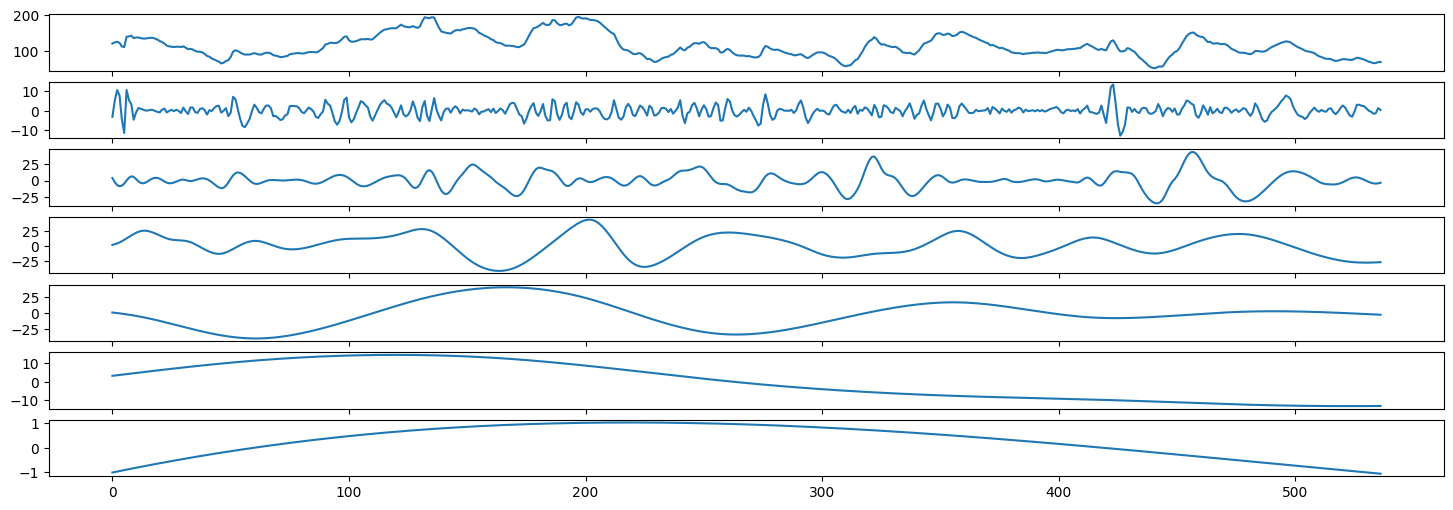

In [54]:
plt.rcParams["figure.figsize"] = (18,6)
plt.subplot(7,1,1)
plt.plot(mat_dat)
for i in range(test.shape[1]):
    plt.subplot(7, 1, i+2)
    plt.plot(test[:,i])

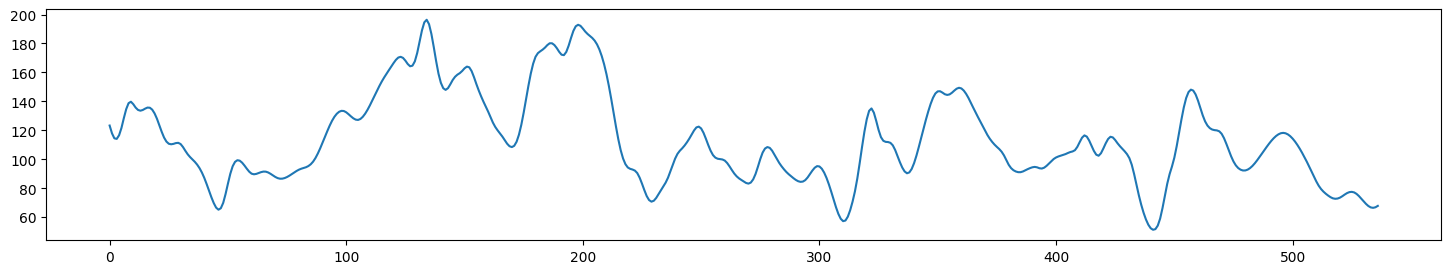

In [55]:
plt.rcParams["figure.figsize"] = (18,3)
rem_fast = mat_dat - test[:,0]
plt.plot(rem_fast)

In [56]:
[wt1, f1, coi1] = eng.cwt(mat_dat, fs, nargout=3)
[wt2, f2, coi2] = eng.cwt(rem_fast, fs, nargout=3)
wt1 = eng.abs(wt1)
wt2 = eng.abs(wt2)
[wcoh,wcs,f] = eng.wcoherence(mat_dat,rem_fast,fs, nargout=3)
lowpass = eng.lowpass(mat_dat, 1/3000, fs)
[wcoh1,wcs1,f1] = eng.wcoherence(mat_dat,lowpass,fs, nargout=3)

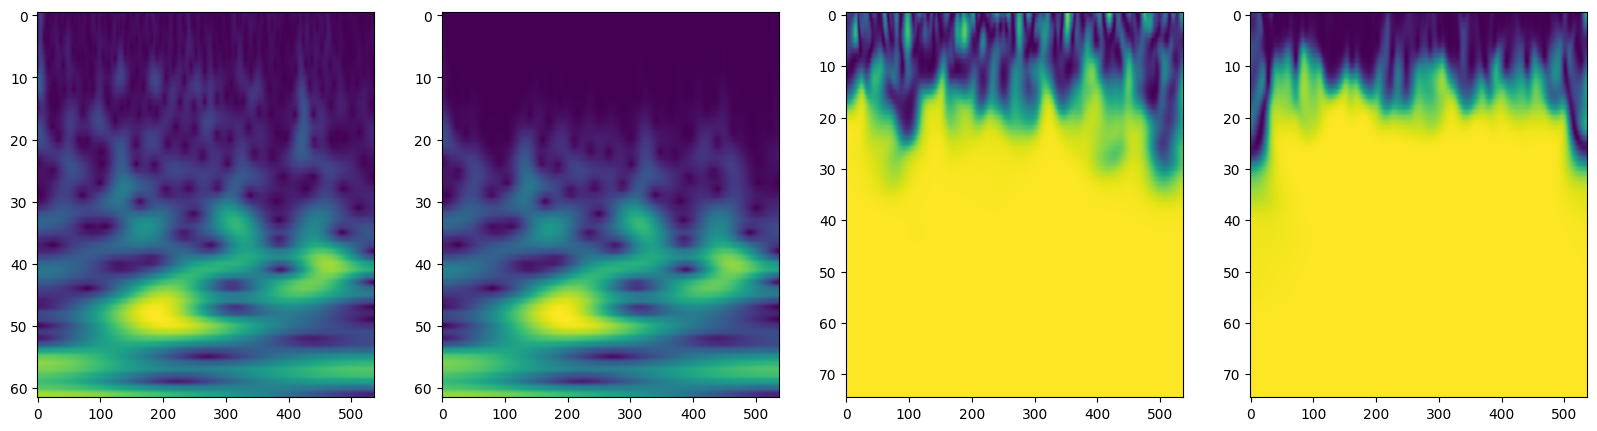

In [57]:
plt.rcParams["figure.figsize"] = (20,5)
plt.subplot(1,4,1)
plt.imshow(wt1, aspect='auto')
plt.subplot(1,4,2)
plt.imshow(wt2, aspect='auto')
plt.subplot(1,4,3)
plt.imshow(wcoh, aspect='auto')
plt.subplot(1,4,4)
plt.imshow(wcoh1, aspect='auto')

## Poincare Over Time

In [58]:
def eclipseFittingMethod(IDI):
    """
    Input:
    
     - IDI: [list] of inter-data-intervals (diff(time_series))
        
    Output: 
             
      - SD1, SD2: {dict} with keys 'SD1' (numpy.float64), representing short-term 
                   variation, and 'SD2' (numpy.float64), representing long-term
                   variation.   
    """
    SDSD =  np.std(np.diff(IDI))
    SDRR = np.std(IDI)
    SD1 = (1 / np.sqrt(2)) * SDSD #measures the width of poincare cloud
    SD2 = np.sqrt((2 * SDRR ** 2) - (0.5 * SDSD ** 2)) #measures the length of the poincare cloud
 
    return {'SD1': round(SD1,3), 'SD2': round(SD2,3), 'SD_ratio': round(SD1/SD2,3)}

In [59]:
interp_df.shape

(1682, 27)

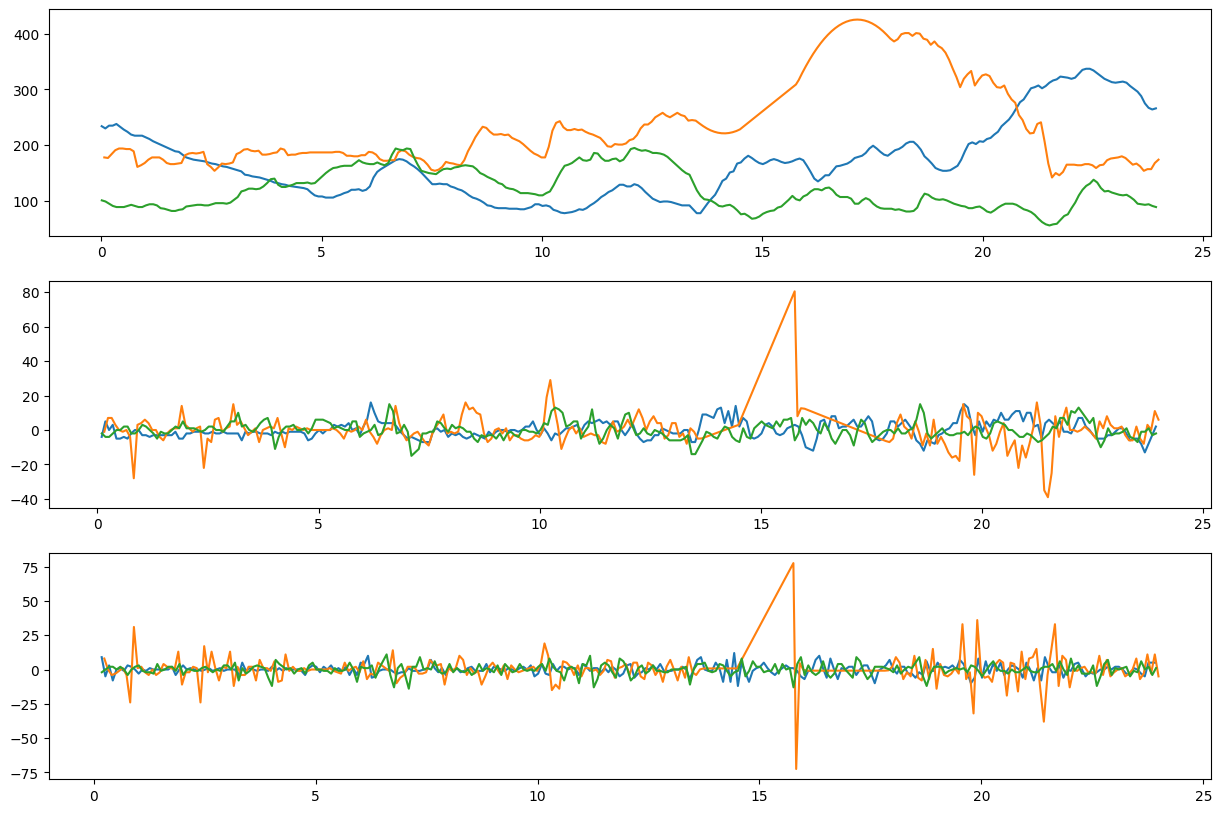

In [60]:
plt.rcParams["figure.figsize"] = (15,10)
for pat in patIDs:
    subset = interp_df.loc[interp_df.PatientId == pat]
    subset2 = subset.loc[subset.day == subset.day.unique()[1]]
    plt.subplot(3,1,1)
    plt.plot(subset2.time, subset2.Value)
    plt.subplot(3,1,2)
    plt.plot(subset2.time[1:], np.diff(subset2.Value))
    plt.subplot(3,1,3)
    plt.plot(subset2.time[2:], np.diff(np.diff(subset2.Value)))
    # for date in subset.day.unique():
    #     subset2 = subset.loc[subset.day == date]
    #     plt.plot(subset2.time, subset2.Value)

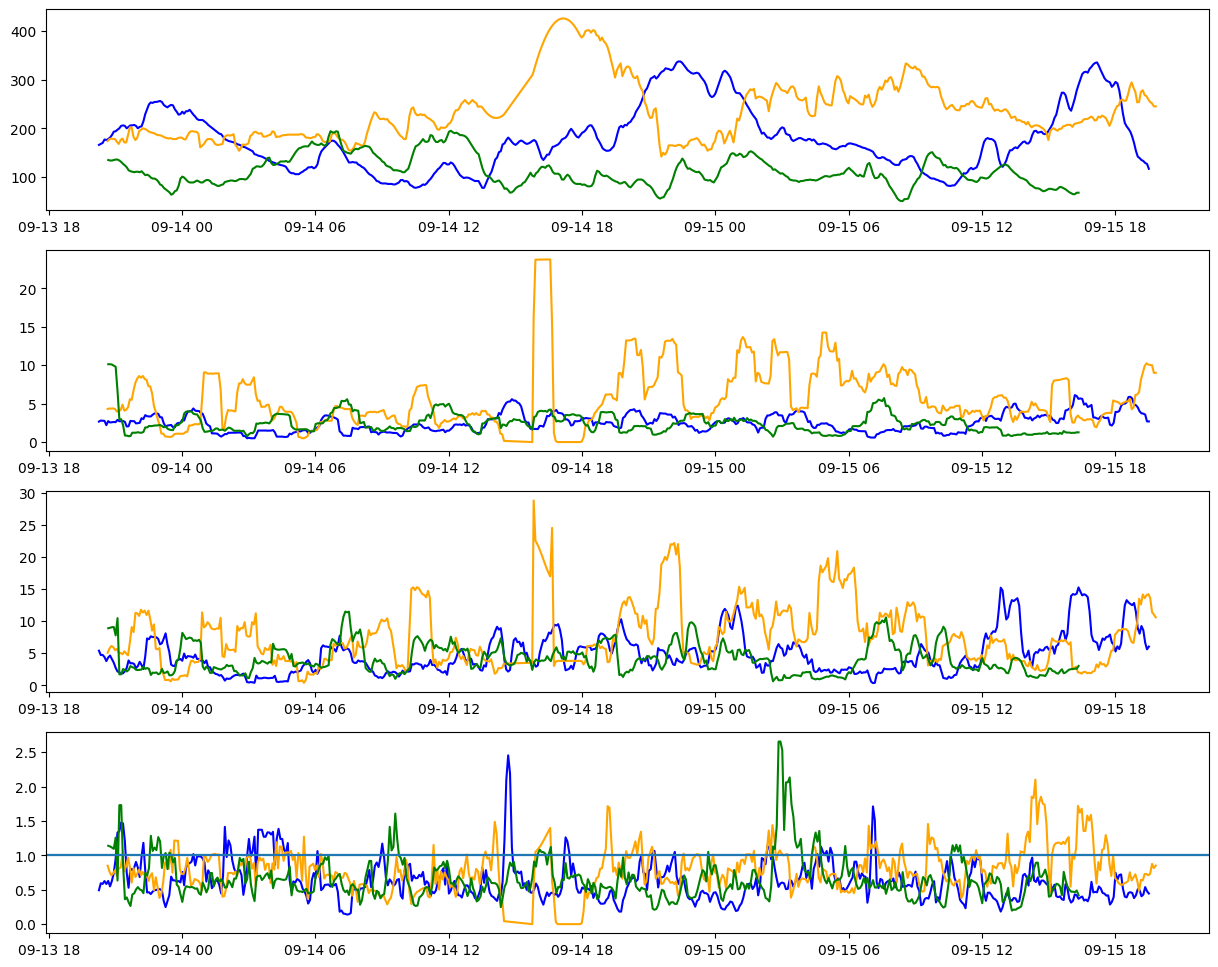

In [61]:
plt.rcParams["figure.figsize"] = (15,12)

window = 12 #1 hour
shift = 1

pncre_df = pd.DataFrame(columns = patIDs)

colors = ['blue', 'orange', 'green']

count = 0
for pat in patIDs:
    subset = interp_df.loc[interp_df.PatientId == pat]
    steps = len(subset.index) // window
    track_SD1 = []
    track_SD2 = []
    track_rat = []
    plt.subplot(4,1,1)
    plt.plot(subset.GlucoseDisplayTime.iloc[window:], subset.Value.iloc[window:], color=colors[count])
    for j in range(len(subset.index)-window):
        segment = subset.Value.iloc[j : j+window]
        pncre = eclipseFittingMethod(np.diff(segment))
        track_SD1.append(pncre['SD1'])
        track_SD2.append(pncre['SD2'])
        track_rat.append(pncre['SD_ratio'])
    plt.subplot(4,1,2)
    plt.plot(subset.GlucoseDisplayTime.iloc[window:] , track_SD1, color=colors[count])
    plt.subplot(4,1,3)
    plt.plot(subset.GlucoseDisplayTime.iloc[window:], track_SD2, color=colors[count])
    plt.subplot(4,1,4)
    plt.plot(subset.GlucoseDisplayTime.iloc[window:], track_rat, color=colors[count])
    plt.axhline(1)
    count += 1
    

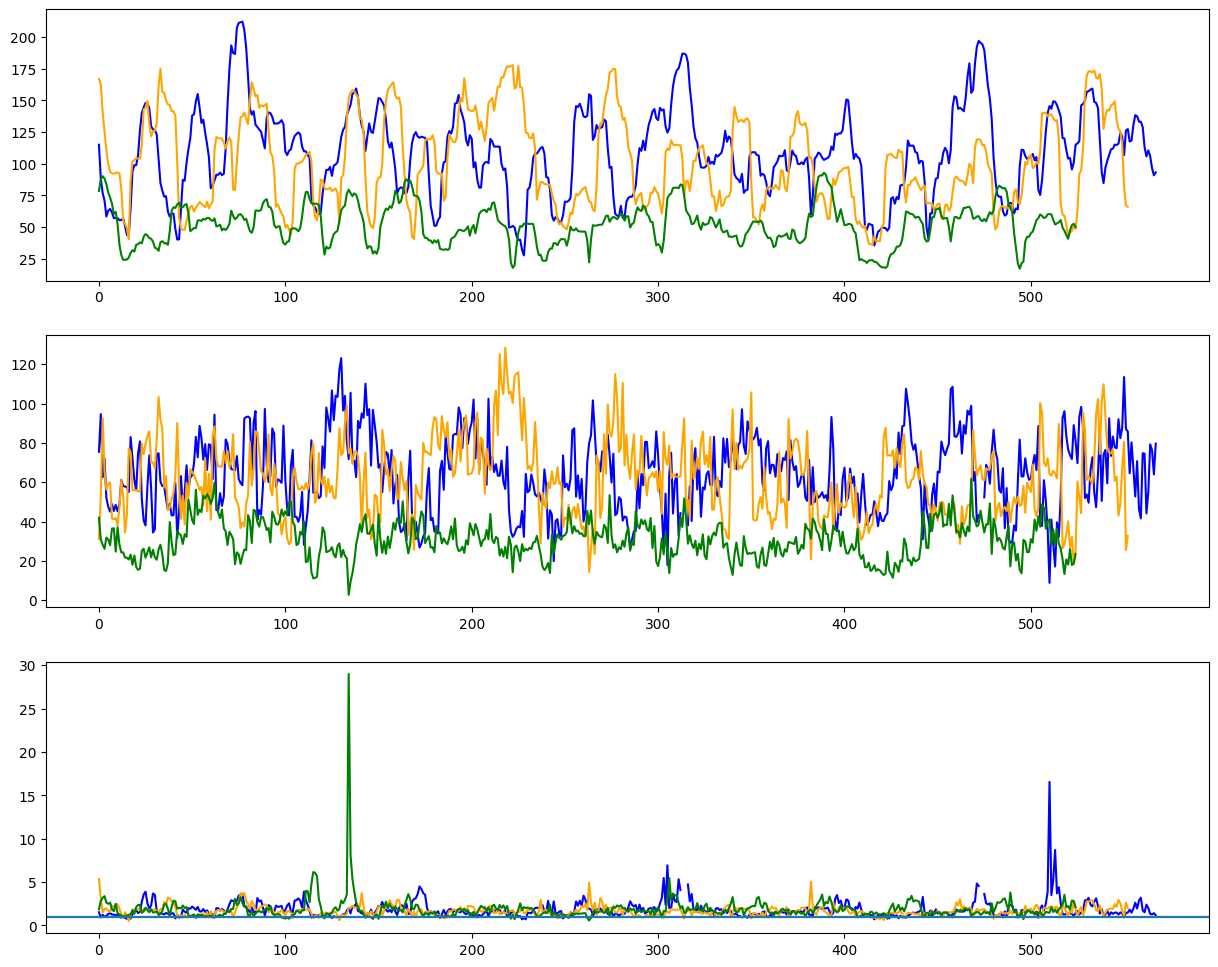

In [62]:
window = 12 #1 hour
shift = 1

pncre_df = pd.DataFrame(columns = patIDs)

colors = ['blue', 'orange', 'green']

count = 0
for pat in patIDs:
    subset = interp_df.loc[interp_df.PatientId == pat]
    subset = subset.sample(frac=1).reset_index(drop=True)
    steps = len(subset.index) // window
    track_SD1 = []
    track_SD2 = []
    track_rat = []
    for j in range(len(subset.index)-window):
        segment = subset.Value.iloc[j : j+window]
        pncre = eclipseFittingMethod(np.diff(segment))
        track_SD1.append(pncre['SD1'])
        track_SD2.append(pncre['SD2'])
        track_rat.append(pncre['SD_ratio'])
    plt.subplot(3,1,1)
    plt.plot(track_SD1, color=colors[count])
    plt.subplot(3,1,2)
    plt.plot(track_SD2, color=colors[count])
    plt.subplot(3,1,3)
    plt.plot(track_rat, color=colors[count])
    plt.axhline(1)
    count += 1
    